### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook, and the quiz questions that follow below.

Start by reading in the libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` In this case imagine, we are interested in testing if the mean height of all individuals in the `full_data` is equal to 67.60 inches.  First, use **quiz 1** below to identify the null and alternative hypotheses for these cases. 

$$H_0: \mu = 67.60$$

$$H_1: \mu \neq 67.60$$


`2.` What is the population mean?  Create a sample set of data using the below code.  What is the sample mean?  What is the standard deviation of the population?  What is the standard deviation of the sampling distribution of the mean of five draws? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. Use **quiz 2** below to assure your answers are correct.  

In [3]:
sample1 = full_data.sample(5)
sample1

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [5]:
# Population mean
full_data.height.mean()

67.59748697307937

In [32]:
full_data.height.std()

3.119433206550344

In [6]:
# Sample mean
sample1.height.mean()

67.88234252049084

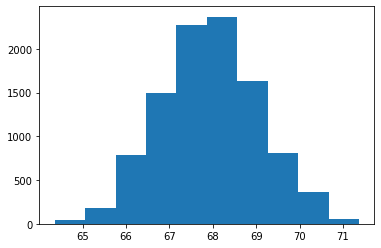

In [13]:
sampling_dist_mean_5 = []
for _ in range(10000):
    sample_of_5 = sample1.sample(5,replace = True)
    sample_mean = sample_of_5.height.mean()
    sampling_dist_mean_5.append(sample_mean)
    
plt.hist(sampling_dist_mean_5);

In [14]:
# the standard deviation of the sampling distribution
std_sampling_dist = np.std(sampling_dist_mean_5)
std_sampling_dist

1.1413345581826075

`3.` Using your null and alternative hypotheses as set up in question 1 and the results of your sampling distribution in question 2, simulate values of the mean values that you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

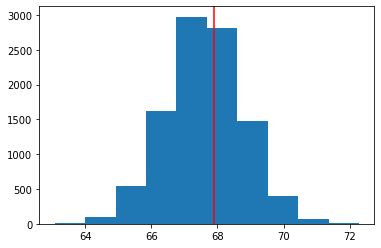

In [16]:
null_mean = 67.60
null_vars = np.random.normal(null_mean,std_sampling_dist,10000)

plt.hist(null_vars);
plt.axvline(x=sample1.height.mean(),c = 'r'); # where our sample mean falls on null dist

In [22]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

obs_mean = sample1.height.mean()
# probability of a statistic higher than observed
prob_more_extreme_high = (null_vars > obs_mean).mean()

# probability a statistic is more extreme lower
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) > null_vars).mean()


pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.8050999999999999

**The above shows a second possible method for obtaining the p-value.  These are pretty different, stability of these values with such a small sample size is an issue. We are essentially shading outside the lines below.**

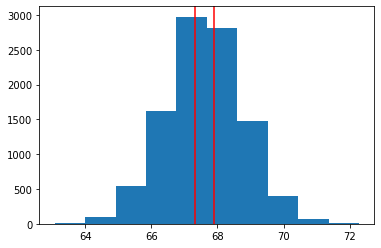

In [24]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vars);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [25]:
print(upper_bound, lower_bound)


67.88234252049084 67.31765747950915


`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

In [27]:
sample2 = full_data.sample(300)

obs_mean = sample2.height.mean()

In [28]:
sampling_dist_mean300 = []

for _ in range(10000):
    sample_of_300 = sample2.sample(300,replace = True)
    sample_mean = sample_of_300.height.mean()
    sampling_dist_mean300.append(sample_mean)
    
std_sampling_dist300 = np.std(sampling_dist_mean300)
null_vals = np.random.normal(null_mean, std_sampling_dist300, 10000)

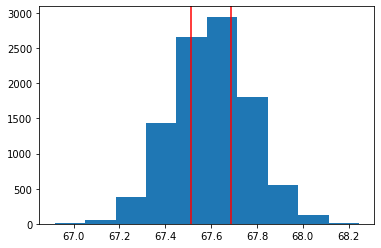

In [29]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [30]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

# probability of a statistic lower than observed
prob_more_extreme_low = (null_vals < lower_bound).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (upper_bound < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval  # With such a large sample size, our sample mean that is super
      # close will be significant at an alpha = 0.1 level.

0.6151

`5.` Reflect on what happened by answering the final quiz in this concept.

**Even with a very small difference between a sample mean and a hypothesized population mean, the difference will end up being significant with a very large sample size.**

### Multiple Tests

In this notebook, you will work with a similar dataset to the judicial dataset you were working with before.  However, instead of working with decisions already being provided, you are provided with a p-value associated with each individual.  

Use the questions in the notebook and the dataset to answer the questions at the bottom of this page.

Here is a glimpse of the data you will be working with:

In [34]:
df = pd.read_csv('judicial_dataset_pvalues.csv')
df.head()

,defendant_id,actual,pvalue
0,22574,innocent,0.294126
1,35637,innocent,0.417981
2,39919,innocent,0.177542
3,29610,guilty,0.015023
4,38273,innocent,0.075371


`1.` Remember back to the null and alternative hypotheses for this example. Use that information to determine the answer for **Quiz 1** and **Quiz 2** below.

`2.` If we consider each individual as a single hypothesis test, find the conservative Bonferroni corrected alpha level we should use to maintain a 5% type I error rate.

In [35]:
bonf_alpha = 0.05/df.shape[0]
bonf_alpha

6.86530275985171e-06

`3.` What is the proportion of type I errors made if the correction isn't used?  How about if it is used?  

Use your answers to find the solution to **Quiz 3** below.

**In order to find the number of type I errors made without the correction - we need to find all those that are actually innocent with p-values less than 0.05.**

In [36]:
df.query("actual == 'innocent' and pvalue < 0.05").count()[0]/df.shape[0] # If not used

0.001510366607167376

In [37]:
df.query("actual == 'innocent' and pvalue < @bonf_alpha").count()[0]/df.shape[0] # If used

0.0

`4.` Think about how hypothesis tests can be used, and why this example wouldn't exactly work in terms of being able to use hypothesis testing in this way.  Check your answer with **Quiz 4** below.

**This is looking at individuals, and that is more of the aim for machine learning techniques.  Hypothesis testing and confidence intervals are for population parameters. Therefore, they are not meant to tell us about individual cases, and we wouldn't obtain p-values for individuals in this way. We could get probabilities, but that isn't the same as the probabilities associated with the relationship to sampling distributions as you have seen in these lessons.**